In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os 
from dotenv import load_dotenv

%matplotlib inline

In [30]:
load_dotenv()

alpaca_api_key = os.getenv("Api_key")
alpaca_secret_key = os.getenv("Secret_Key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


type(alpaca_api_key)


str

In [31]:
xle_df = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')


xlf_df = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')

ive_df = api.alpha_vantage.historic_quotes('IVE', adjusted=True, output_format='pandas')
ive_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-04-30,107.46,107.56,106.10,106.49,106.49,1351097.0,0.0,1.0
2020-04-29,108.67,109.60,107.95,108.70,108.70,1731947.0,0.0,1.0
2020-04-28,107.94,108.25,106.28,106.64,106.64,2048623.0,0.0,1.0
2020-04-27,104.68,106.64,104.56,106.19,106.19,1154618.0,0.0,1.0
2020-04-24,103.31,104.37,102.42,103.99,103.99,969806.0,0.0,1.0


In [32]:
xle_df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [33]:
ive_df.columns



Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [34]:
xlf_df.columns


Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [35]:

xle_df=xle_df['5. adjusted close']
xle_df.head()
xlf_df = xlf_df['5. adjusted close']
xlf_df.head()
ive_df= ive_df ['5. adjusted close']
ive_df.head()



concat_df = pd.concat([xle_df, xlf_df, ive_df], axis = "columns", join = "inner")
concat_df.head()

,5. adjusted close,5. adjusted close,5. adjusted close
date,,,
2020-04-30,38.00,22.79,106.49
2020-04-29,38.86,23.38,108.70
2020-04-28,36.18,22.72,106.64
2020-04-27,35.37,22.48,106.19
2020-04-24,34.62,21.74,103.99


In [36]:
columns = ['XLE close', 'XLF close', 'IVE close']
concat_df.columns = columns
concat_df.head()

,XLE close,XLF close,IVE close
date,,,
2020-04-30,38.00,22.79,106.49
2020-04-29,38.86,23.38,108.70
2020-04-28,36.18,22.72,106.64
2020-04-27,35.37,22.48,106.19
2020-04-24,34.62,21.74,103.99


In [37]:
daily_returns_xle = xle_df.pct_change()
concat_df['XLE_return']= daily_returns_xle 


daily_returns_xlf = xlf_df.pct_change()
concat_df['XLF_return']= daily_returns_xlf 

daily_returns_ive = ive_df.pct_change()
concat_df['IVE_return']= daily_returns_ive 

concat_df.head()

,XLE close,XLF close,IVE close,XLE_return,XLF_return,IVE_return
date,,,,,,
2020-04-30,38.00,22.79,106.49,NaN,NaN,NaN
2020-04-29,38.86,23.38,108.70,0.022632,0.025889,0.020753
2020-04-28,36.18,22.72,106.64,-0.068966,-0.028229,-0.018951
2020-04-27,35.37,22.48,106.19,-0.022388,-0.010563,-0.004220
2020-04-24,34.62,21.74,103.99,-0.021204,-0.032918,-0.020718


In [38]:
concat_df.dropna(inplace=True)

#count nulls again
concat_df.isnull().sum()

XLE close     0
XLF close     0
IVE close     0
XLE_return    0
XLF_return    0
IVE_return    0
dtype: int64

In [39]:
concat_df.drop_duplicates(inplace=True)
concat_df

,XLE close,XLF close,IVE close,XLE_return,XLF_return,IVE_return
date,,,,,,
2020-04-29,38.8600,23.3800,108.7000,0.022632,0.025889,0.020753
2020-04-28,36.1800,22.7200,106.6400,-0.068966,-0.028229,-0.018951
2020-04-27,35.3700,22.4800,106.1900,-0.022388,-0.010563,-0.004220
2020-04-24,34.6200,21.7400,103.9900,-0.021204,-0.032918,-0.020718
2020-04-23,34.5400,21.4300,102.7000,-0.002311,-0.014259,-0.012405
...,...,...,...,...,...,...
2000-06-02,19.6712,14.5807,39.9311,0.014455,0.023164,0.004516
2000-06-01,20.3655,14.0070,39.3797,0.035295,-0.039347,-0.013809
2000-05-31,20.5566,13.5578,38.7899,0.009384,-0.032070,-0.014977


In [40]:
concat_df.dtypes

XLE close     float64
XLF close     float64
IVE close     float64
XLE_return    float64
XLF_return    float64
IVE_return    float64
dtype: object

In [41]:
concat_df.count()


XLE close     5012
XLF close     5012
IVE close     5012
XLE_return    5012
XLF_return    5012
IVE_return    5012
dtype: int64

In [42]:
concat_df.describe()

,XLE close,XLF close,IVE close,XLE_return,XLF_return,IVE_return
count,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000
mean,44.793516,16.683295,60.680944,0.000033,0.000069,-0.000122
std,17.780574,5.465968,26.173253,0.018266,0.018951,0.012921
min,13.110500,4.097100,23.767400,-0.166829,-0.140908,-0.096693
25%,29.466425,12.756900,40.283900,-0.009202,-0.007463,-0.005785
50%,49.703800,16.248600,50.947650,-0.000593,-0.000463,-0.000714
75%,58.902650,19.805725,80.506825,0.008027,0.006620,0.004801
max,81.486300,30.891400,130.626300,0.252212,0.200006,0.125944


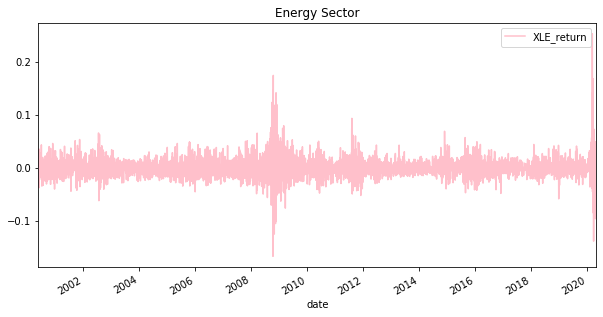

In [45]:
concat_df['XLE_return'].plot(figsize=(10,5), legend= True, title= "Energy Sector", color= "pink")

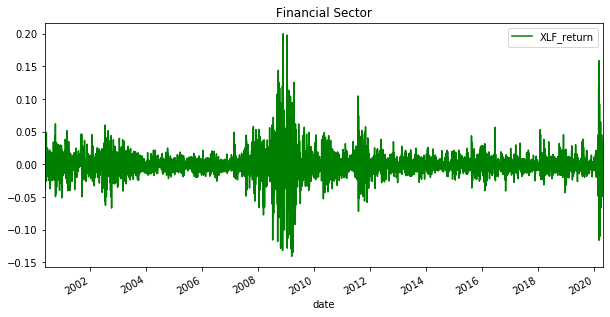

In [46]:
concat_df['XLF_return'].plot(figsize=(10,5), legend= True, title="Financial Sector", color="green")

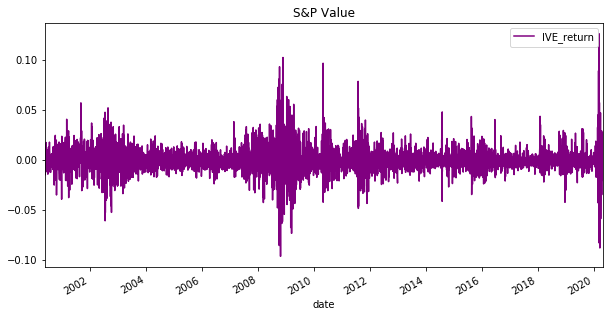

In [47]:
concat_df['IVE_return'].plot(figsize=(10,5), legend= True, title= "S&P Value", color= "purple")

In [48]:

cumulative_returns_xle = (1 + concat_df['XLE_return']).cumprod()
cumulative_returns_xlf = (1 + concat_df['XLF_return']).cumprod()
cumulative_returns_ive =(1+ concat_df['IVE_return']).cumprod()
cumulative_returns_xle.head()

date
2020-04-29    1.022632
2020-04-28    0.952105
2020-04-27    0.930789
2020-04-24    0.911053
2020-04-23    0.908947
Name: XLE_return, dtype: float64

In [49]:
#umulative_returns_xle.rename(columns={'5. adjusted close':'XLE'})
#cumulative_returns_xle

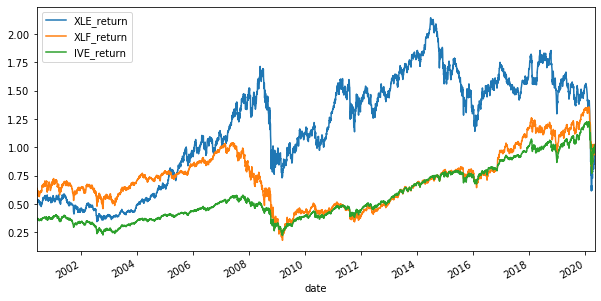

In [50]:
cumulative_returns_xle.plot(figsize=(10,5), legend= True)
cumulative_returns_xlf.plot(figsize=(10,5), legend= True)
cumulative_returns_ive.plot(figsize= (10,5), legend= True)

In [ ]:
#need to rename 